In [7]:
# Importar las librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
import os
#Muestra el directorio de trabajo actual
os.chdir('C:/Users/rodri/OneDrive/Cursos y Certificados/Curso de Python ML - Machine Learning A-Z AI, Python & R + ChatGPT Prize [2024]/Section 8 - Polynomial Linear Regression')

In [24]:
# Importar los datasets

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
#Vamos a hacer una comparativa entre los dos modelos el Lineal y el Polinomial para ver cual es el que tiene un mejor desempeño

# Entrenar el modelo de regresion Lineal con todo el dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Entrenar el modelo de regresion Lineal Polinomica con todo el dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # Puedes cambiar el grado del polinomio dependiendo de cual crees que se ajuste mejor a tu modelo
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

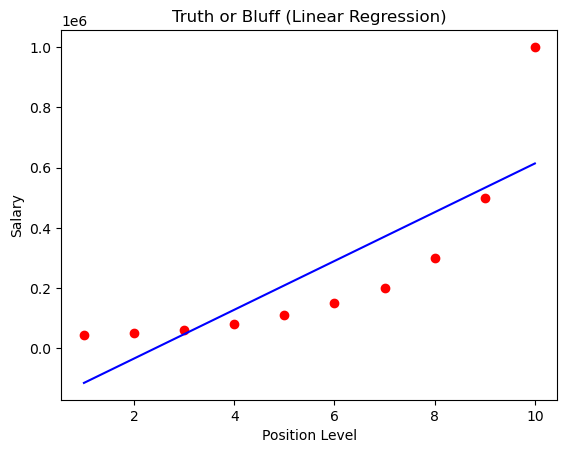

In [11]:
#Visualizamos los resultados de la Regresión lineal

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

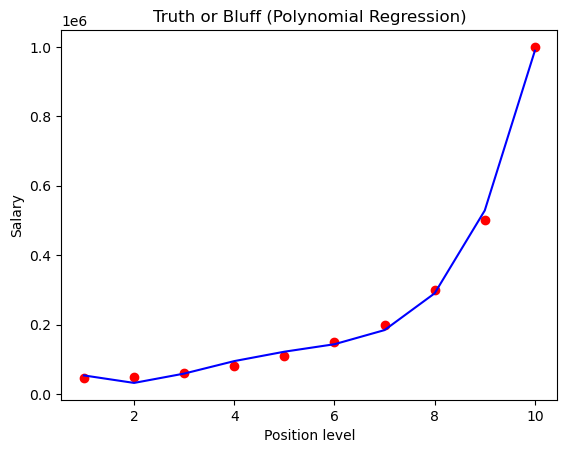

In [12]:
#Visulizamos los resultados de la regresion Polinomial

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_17244\2566041845.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


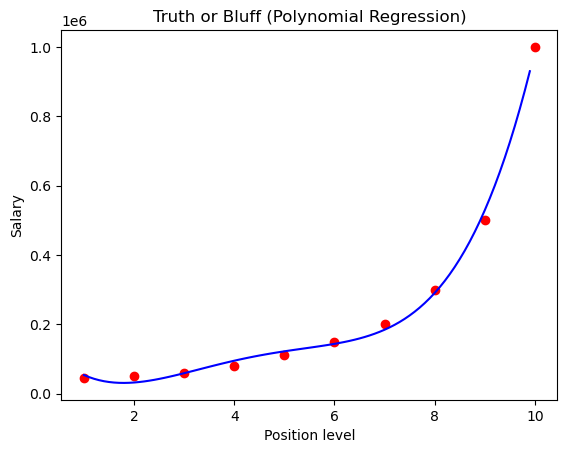

In [13]:
#Como vimos que la regresion polinomial se adapta mejor a la forma de nuestro dataset, lo que haremos es que la grafica se vea un poco mas suave

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
# Predecimos algun resultado con la regresion lineal
lin_reg.predict([[6.5]])

array([330378.78787879])

In [15]:
# Predecimos el resultado ahora con la regresion polinomial
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])

In [ ]:
# Podemos observar una gran diferencia entre estos dos modelos, vamos a revisar los desempeños que tiene cada uno para asegurarnos que el modelo polinomial es el bueno

In [16]:
# Creación del modelo utilizando matrices como en scikitlearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y, exog=X,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Sun, 30 Jun 2024   Prob (F-statistic):            0.00383
Time:                        23:02:35   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.953e+05   1.25e+05     -1.565      0.1

C:\Users\rodri\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
# Intervalos de confianza de los coeficientes del modelo

modelo.conf_int(alpha=0.05)

array([[-483100.06850251,   92433.40183584],
       [  34500.9791824 ,  127256.59657517]])

In [19]:
#Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-114454.545455,107367.433797,-362044.291759,133135.200850,-603075.079696,374165.988787
1,-33575.757576,91059.879995,-243560.217380,176408.702229,-504259.109062,437107.593910
2,47303.030303,76583.311975,-129298.403786,223904.464392,-409465.412707,504071.473313
3,128181.818182,65169.560574,-22099.457979,278463.094343,-319069.571946,575433.208310


In [21]:
# Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X).summary_frame(alpha=0.05)
predicciones['x'] = X[:, 1]
predicciones['y'] = y
predicciones = predicciones.sort_values('x')

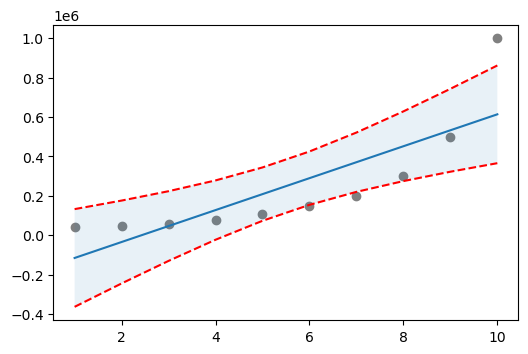

In [22]:
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)

In [23]:
# Observamos que los datos parecieran estar dentro del intervalos de confianza, pero podemos observar que son muy pocos los que en realidad quedan con la regresion, y ademas con los datos de su R^2 adj
# el cual es el desempeño del modelo, vemos que un 62% no es un gran desempeño para este modelo.

# Intentemos ahora con la regresión polinomial

In [27]:
# Crear un DataFrame para manejar los datos más fácilmente
data = pd.DataFrame(X, columns=['Level'])
data['Salary'] = y

# Crear términos polinomiales
degree = 4  # Ajusta este valor al grado deseado del polinomio
for i in range(2, degree + 1):
    data[f'Level_{i}'] = data['Level'] ** i

In [28]:
# Crear la matriz de predictores y agregar una constante para el intercepto
X_poly = data.drop(columns=['Salary'])
X_poly = sm.add_constant(X_poly)

# Ajustar el modelo de regresión polinomial
modelo = sm.OLS(endog=data['Salary'], exog=X_poly)
modelo = modelo.fit()

# Imprimir el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.21e-06
Time:                        23:12:44   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.0

C:\Users\rodri\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


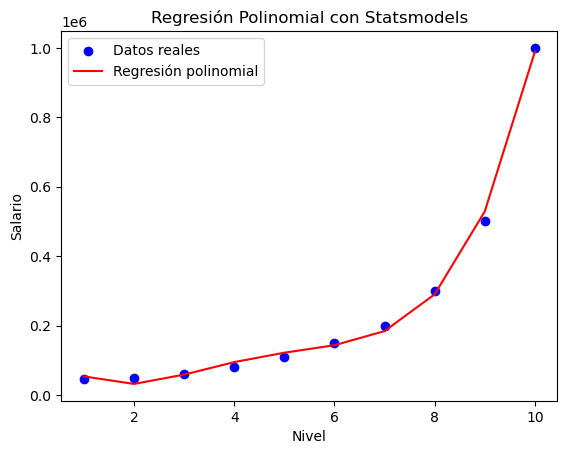

In [29]:
# Predicciones del modelo
data['Predicted_Salary'] = modelo.predict(X_poly)

# Visualizar los resultados
plt.scatter(data['Level'], data['Salary'], color='blue', label='Datos reales')
plt.plot(data['Level'], data['Predicted_Salary'], color='red', label='Regresión polinomial')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.title('Regresión Polinomial con Statsmodels')
plt.legend()
plt.show()

In [ ]:
# Vemos como ahora esta regresion se ajusta casi perfecto a nuestro dataset, vemos que el desempeño del modelo es de un 99.5% el cual es un gran desempeño en el cual podemos confiar 
# he de aclarar que para esto hay que asegurarnos de no tener un modelo sobre ajustado pero para eso habra que hacer pruebas que veremos mas adelante.

# Pero por el momento quedemonos con que es un gran modelo y que tiene un gran desempeño.